In [60]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tqdm import tqdm
import tensorflow_datasets as tfds
import matplotlib.ticker as mticker

In [61]:
train_data, info = tfds.load("fashion_mnist", split = "train", with_info = True, data_dir='./data/', download=True)
test_data = tfds.load("fashion_mnist", split = "test", data_dir='./data/', download=True)

In [62]:
class_names = ["T-shirt/top", "Trouser/pants", "Pullover shirt", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [63]:
def format_image(data):
  image=data['image']
  image=tf.reshape(image,[-1])
  image=tf.cast(image,dtype='float32')
  image=image/255.0
  return image,data['label']

In [64]:
train_data=train_data.map(format_image)
test_data=test_data.map(format_image)

In [74]:
batch_size=64
train=train_data.shuffle(buffer_size=1024).batch(batch_size)
test=test_data.batch(batch_size=batch_size)

In [75]:
def base_model():
  inputs=tf.keras.layers.Input(shape=(784,))
  x=tf.keras.layers.Dense(64,activation='relu')(inputs)
  x=tf.keras.layers.Dense(64,activation='relu')(x)
  outputs=tf.keras.layers.Dense(10,activation='softmax',name='predictions')(x)
  model=tf.keras.Model(inputs=inputs,outputs=outputs)
  return model

In [76]:
optimizer=tf.keras.optimizers.Adam()
loss_object=tf.keras.losses.SparseCategoricalCrossentropy()

In [77]:
train_acc_metric=tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric=tf.keras.metrics.SparseCategoricalAccuracy()

In [78]:
def apply_gradient(optimizer,model,x,y):
  with tf.GradientTape() as t:

    logits=model(x)
    loss_value=loss_object(y,logits)
  gradients=t.gradient(loss_value,model.trainable_weights)
  optimizer.apply_gradients(zip(gradients,model.trainable_weights))
  return logits,loss_value

In [79]:
def train_per_epoch():
  losses=[]
  pbar= tqdm(total=len(list(enumerate(train))), position=0, leave=True, bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} ')
  for step,(x_batch_train,y_batch_train) in enumerate(train):
    logits,loss_value=apply_gradient(optimizer,model,x_batch_train,y_batch_train)
    losses.append(loss_value)
    train_acc_metric(y_batch_train,logits)
    pbar.set_description("Training loss for step %s: %.4f" % (int(step), float(loss_value)))
    pbar.update()
  return losses

In [80]:
def validation():
  losses=[]
  for x_val,y_val in test:
    val_logits=model(x_val)
    val_loss=loss_object(y_true=y_val,y_pred=val_logits)
    losses.append(val_loss)
    val_acc_metric(y_val,val_logits)
  return losses

In [84]:
model=base_model()
epochs=10
epoch_val_losses,epoch_train_losses=[],[]

In [86]:
for epoch in range(epochs):
  print('Start of epoch %d' % (epoch))
  losses_train=train_per_epoch()
  train_accuracy=train_acc_metric.result()
  losses_val=validation()
  val_accuracy=val_acc_metric.result()
  losses_train_mean=np.mean(losses_train)
  loss_val_mean=np.mean(losses_val)
  epoch_val_losses.append(loss_val_mean)
  epoch_train_losses.append(losses_train_mean)
  print('\n Epoch %s: Train loss: %.4f  Validation Loss: %.4f, Train Accuracy: %.4f, Validation Accuracy %.4f' % (epoch, float(losses_train_mean), float(loss_val_mean), float(train_accuracy), float(val_accuracy)))
  train_acc_metric.reset_states()
  val_acc_metric.reset_states()

Start of epoch 0


  0%|          | 0/157 
  0%|          | 0/157 
  0%|          | 0/157 
  0%|          | 0/157 
Training loss for step 937: 0.3467: 100%|██████████| 938/938 
Training loss for step 937: 0.2234: 100%|██████████| 938/938 
Training loss for step 937: 0.4906: 100%|██████████| 938/938 



 Epoch 0: Train loss: 0.3687  Validation Loss: 0.3891, Train Accuracy: 0.8407, Validation Accuracy 0.8534
Start of epoch 1


Training loss for step 937: 0.3186: 100%|█████████▉| 937/938 


 Epoch 1: Train loss: 0.3362  Validation Loss: 0.3653, Train Accuracy: 0.8765, Validation Accuracy 0.8692
Start of epoch 2


Training loss for step 937: 0.3186: 100%|██████████| 938/938 
Training loss for step 937: 0.3011: 100%|██████████| 938/938 



 Epoch 2: Train loss: 0.3176  Validation Loss: 0.3670, Train Accuracy: 0.8841, Validation Accuracy 0.8708
Start of epoch 3


Training loss for step 937: 0.2432: 100%|█████████▉| 937/938 


 Epoch 3: Train loss: 0.3020  Validation Loss: 0.3554, Train Accuracy: 0.8892, Validation Accuracy 0.8711
Start of epoch 4


Training loss for step 937: 0.2432: 100%|██████████| 938/938 
Training loss for step 937: 0.3259: 100%|█████████▉| 937/938 


 Epoch 4: Train loss: 0.2907  Validation Loss: 0.3701, Train Accuracy: 0.8925, Validation Accuracy 0.8676
Start of epoch 5


Training loss for step 937: 0.3259: 100%|██████████| 938/938 
Training loss for step 937: 0.2559: 100%|██████████| 938/938 



 Epoch 5: Train loss: 0.2820  Validation Loss: 0.3525, Train Accuracy: 0.8963, Validation Accuracy 0.8720
Start of epoch 6


Training loss for step 937: 0.2568: 100%|█████████▉| 937/938 


 Epoch 6: Train loss: 0.2734  Validation Loss: 0.3411, Train Accuracy: 0.8986, Validation Accuracy 0.8783
Start of epoch 7


Training loss for step 937: 0.2568: 100%|██████████| 938/938 
Training loss for step 937: 0.1162: 100%|█████████▉| 937/938 


 Epoch 7: Train loss: 0.2634  Validation Loss: 0.3444, Train Accuracy: 0.9025, Validation Accuracy 0.8776
Start of epoch 8


Training loss for step 937: 0.1162: 100%|██████████| 938/938 
Training loss for step 937: 0.2972: 100%|██████████| 938/938 



 Epoch 8: Train loss: 0.2590  Validation Loss: 0.3554, Train Accuracy: 0.9038, Validation Accuracy 0.8756
Start of epoch 9


Training loss for step 937: 0.4864: 100%|█████████▉| 937/938 


 Epoch 9: Train loss: 0.2510  Validation Loss: 0.3461, Train Accuracy: 0.9068, Validation Accuracy 0.8778


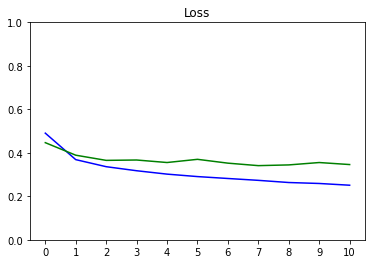

In [87]:
def plot_metrics(train_metric, val_metric, metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
  plt.plot(train_metric,color='blue',label=metric_name)
  plt.plot(val_metric,color='green',label='val_' + metric_name)

plot_metrics(epoch_train_losses, epoch_val_losses, "Loss", "Loss", ylim=1.0)

In [88]:
def display_images(image, predictions, labels, title, n):

  display_strings = [str(i) + "\n\n" + str(j) for i, j in zip(predictions, labels)] 

  plt.figure(figsize=(17,3))
  plt.title(title)
  plt.yticks([])
  plt.xticks([28*x+14 for x in range(n)], display_strings)
  plt.grid(None)
  image = np.reshape(image, [n, 28, 28])
  image = np.swapaxes(image, 0, 1)
  image = np.reshape(image, [28, 28*n])
  plt.imshow(image)

Training loss for step 937: 0.4864: 100%|██████████| 938/938 

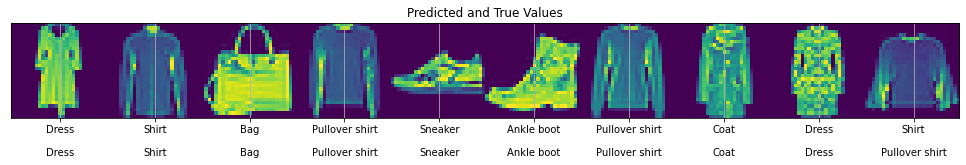

In [89]:
test_inputs = test_data.batch(batch_size=1000001)
x_batches, y_pred_batches, y_true_batches = [], [], []

for x, y in test_inputs:
  y_pred = model(x)
  y_pred_batches = y_pred.numpy()
  y_true_batches = y.numpy()
  x_batches = x.numpy()

indexes = np.random.choice(len(y_pred_batches), size=10)
images_to_plot = x_batches[indexes]
y_pred_to_plot = y_pred_batches[indexes]
y_true_to_plot = y_true_batches[indexes]

y_pred_labels = [class_names[np.argmax(sel_y_pred)] for sel_y_pred in y_pred_to_plot]
y_true_labels = [class_names[sel_y_true] for sel_y_true in y_true_to_plot]
display_images(images_to_plot, y_pred_labels, y_true_labels, "Predicted and True Values", 10)